##### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [341]:
# Importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Loading the DataFrame

In [342]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Statistical Information

In [343]:
df.shape

(614, 13)

- we have 614 rows and 13 columns

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- All features are of categeorical data except ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [345]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- There is lot of difference b/w 75% and max ,we can assume that outliers will be present
- we can spot difference in mean and std which says skewness is present in the data

In [346]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Getting all object type unique values 

In [347]:
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [348]:
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--------------------------------------
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
-----------

In [349]:
df.Loan_ID.value_counts().sum()

614

- we can drop the Load id as it is not userful in generating a model

In [350]:
# Dropping the unwanted column
df.drop(columns=['Loan_ID'],inplace=True,axis=1)

- we have 2 categeories in feature Gender
    * Male      489
    * Female    112
- we have 2 categeories in feature Married
    * Yes    398
    * No     213
- we have 4 categeories in feature Dependents
    * 0     345
    * 1     102
    * 2     101
    * 3+     51
- we have 2 categeories in feature Education
    * Graduate        480
    * Not Graduate    134
- we have 2 categeories in feature Self_Employed
    * No     500
    * Yes     82
- we have 3 categeories in feature Property_Area
    * Semiurban    233
    * Urban        202
    * Rural        179
- we have 2 categeories in feature Loan_Status
    * Y    422
    * N    192
    - There is class imbalance in the target class

#### Finding NaN values in the Dataset

In [351]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

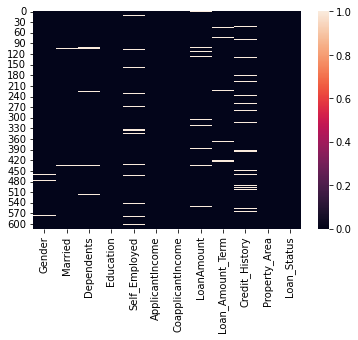

In [352]:
sns.heatmap(df.isnull())

- we have NaN values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [353]:
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type] in ['int64','float64']:
        features_list.append(feature_type)
features_list

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [354]:
for i in features_list:
    print(f'The unquie values in {i} are {df[i].unique()}')

The unquie values in ApplicantIncome are [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  64

#### Filling NaN values for categeorical data using simple imputer

In [355]:
from sklearn.impute import SimpleImputer,KNNImputer 

In [356]:
catg_ftrs_hvng_nan_values = ['Gender','Married','Dependents','Self_Employed','Credit_History']
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)
si = si.fit(df[catg_ftrs_hvng_nan_values])
df[catg_ftrs_hvng_nan_values]  =si.transform(df[catg_ftrs_hvng_nan_values])
df[catg_ftrs_hvng_nan_values].isnull().sum()

Gender            0
Married           0
Dependents        0
Self_Employed     0
Credit_History    0
dtype: int64

#### Filling NaN values for numerical data using KNN imputer

In [357]:
num_ftrs_hvng_nan_values =['LoanAmount','Loan_Amount_Term']
knn = KNNImputer(n_neighbors=2)
df[num_ftrs_hvng_nan_values] = knn.fit_transform(df[num_ftrs_hvng_nan_values])

#### Checking for nan values to confirm no NaN values are present

<AxesSubplot:>

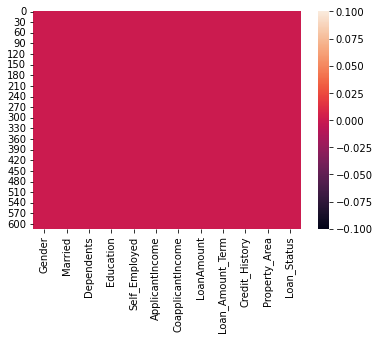

In [358]:
sns.heatmap(df.isnull())

- Now no null values are present in DataFrame

##### Comparision of different features with target variables
###### Univariate Analaysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

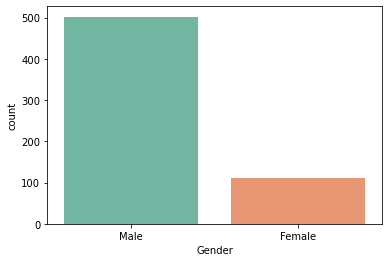

In [359]:
sns.countplot(df['Gender'],palette='Set2')

- Most of the candidates are male candidates who has applied for loan

<AxesSubplot:xlabel='Married', ylabel='count'>

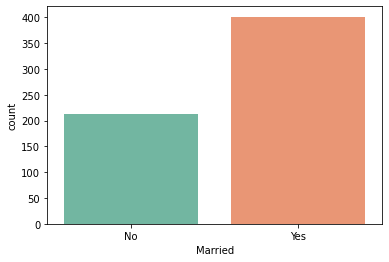

In [360]:
sns.countplot(df['Married'],palette='Set2')

- Most of the candidates are married candidates who has applied for loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

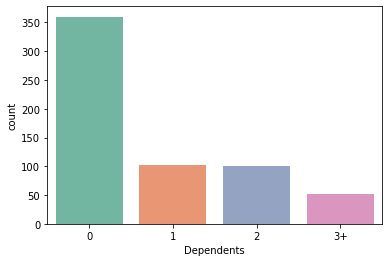

In [361]:
sns.countplot(df['Dependents'],palette='Set2')

- The dependents with 0 count are more in dataset
- The dependents with 0 and 1 are equal
- 3+ dependent count is very very less

<AxesSubplot:xlabel='Education', ylabel='count'>

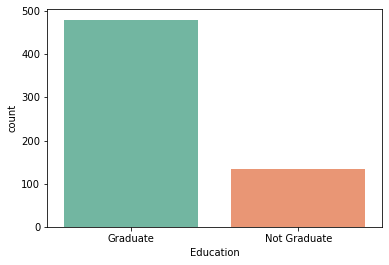

In [362]:
sns.countplot(df['Education'],palette='Set2')

- More applicants are graduates

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

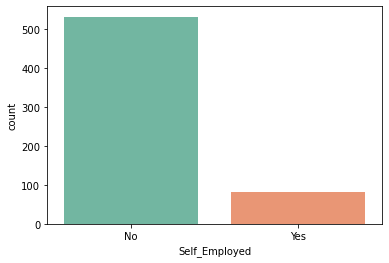

In [363]:
sns.countplot(df['Self_Employed'],palette='Set2')

- Most of the applicants are not Self Employed

([<matplotlib.patches.Wedge at 0x7fb414eba9d0>,
 [Text(-1.0045945733519528, 0.44809568530818045, 'No'),
  Text(1.0045946153056944, -0.44809559125124654, 'Yes')],
 [Text(-0.5479606763737924, 0.24441582834991657, '86.64%'),
  Text(0.5479606992576513, -0.24441577704613446, '13.36%')])

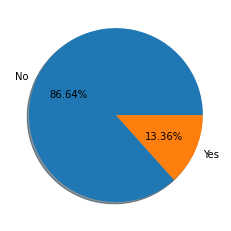

In [364]:
labels = 'No','Yes'
fig,ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)

([<matplotlib.patches.Wedge at 0x7fb3e6554f10>,
 [Text(-0.9879045669906418, 0.4837815276744586, '1'),
  Text(0.9879045216957419, -0.48378162016875703, '0')],
 [Text(-0.53885703654035, 0.26388083327697737, '85.50%'),
  Text(0.538857011834041, -0.2638808837284129, '14.50%')])

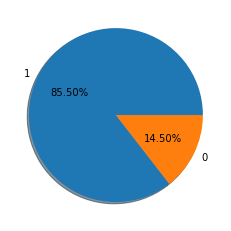

In [365]:
labels = 1,0
fig,ax = plt.subplots()
ax.pie(df['Credit_History'].value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)

- Credit_History with value 1 is more in DataSet

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

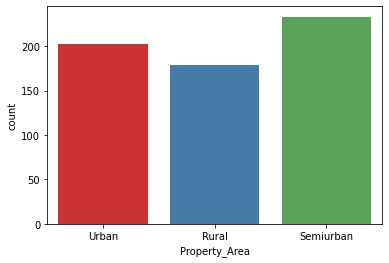

In [366]:
sns.countplot(df['Property_Area'],palette='Set1')

([<matplotlib.patches.Wedge at 0x7fb3e685a8b0>,
 [Text(0.4066109851137259, 1.0220897743275028, 'Semiurban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348556, 'Rural')],
 [Text(0.22178781006203227, 0.5575035132695468, '37.95%'),
  Text(-0.5772433981845698, -0.16367669123100625, '32.90%'),
  Text(0.3654597992629036, -0.47585621265537575, '29.15%')])

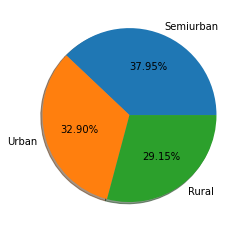

In [367]:
labels = 'Semiurban','Urban','Rural'
fig,ax = plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)

- Most applicants are from semiurban area followed by urban and Rural

([<matplotlib.patches.Wedge at 0x7fb41370a400>,
 [Text(-0.6105420895241798, 0.9150072988339758, 'Y'),
  Text(0.6105420038550106, -0.9150073559970479, 'N')],
 [Text(-0.33302295792227987, 0.49909489027307763, '68.73%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.27%')])

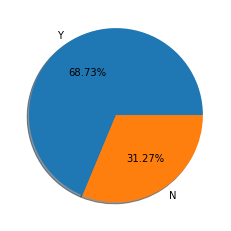

In [368]:
labels = 'Y','N'
fig,ax = plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)

- 68.73% people has got Loan

###### Bivariate Analaysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

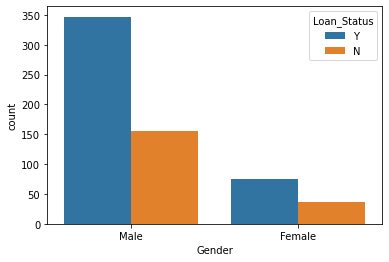

In [369]:
sns.countplot(x='Gender',hue='Loan_Status',data = df)

- Most of male candiates applied for loan
- In those applications most of them had got loan

<AxesSubplot:xlabel='Married', ylabel='count'>

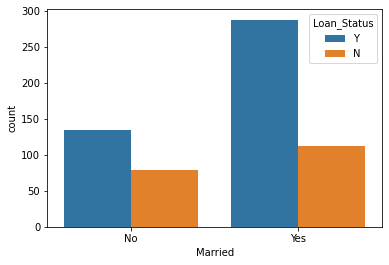

In [370]:
sns.countplot(x='Married',hue='Loan_Status',data = df)

- Most of Married candiates applied for loan
- In those candiates most of them had got loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

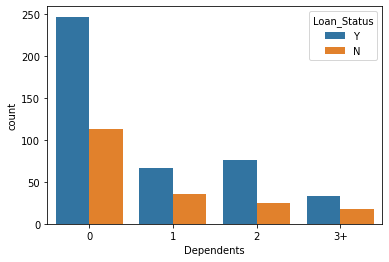

In [371]:
sns.countplot(x='Dependents',hue='Loan_Status',data = df)

- Most of the candidates have no dependents
- out of those most of the applicants got the loan

<AxesSubplot:xlabel='Education', ylabel='count'>

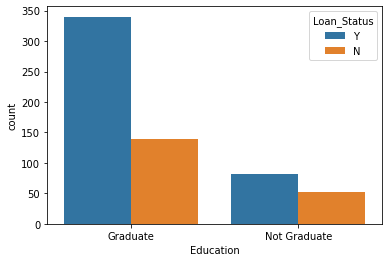

In [372]:
sns.countplot(x='Education',hue='Loan_Status',data = df)

- Most of the applicants are graduates
- In the total graduates most of them had got loan,30-40% didnot get the loan

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

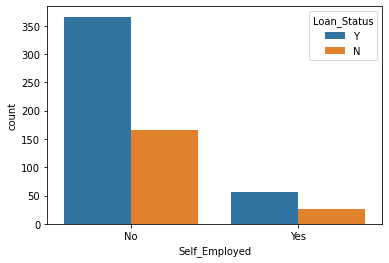

In [373]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data = df)

- Most of the candidates are not self-employed and got the loan 50% have rejections too.
- The people are less in count for self employed people most of them got loan compared to non self employed candidates

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

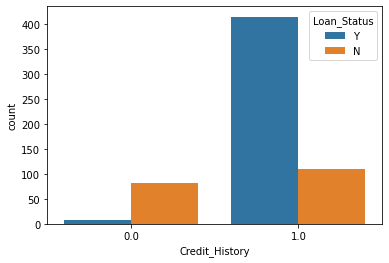

In [374]:
sns.countplot(x='Credit_History',hue='Loan_Status',data = df)

- Most of the people have 1 as the credit history and has good count of loan approvals.
- There is very less rate for 0 variable and has lot of loan rejections

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

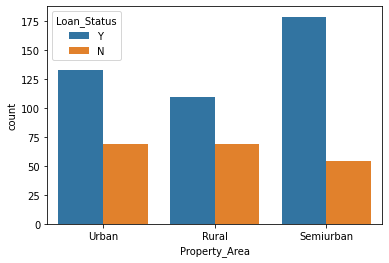

In [375]:
sns.countplot(x='Property_Area',hue='Loan_Status',data = df)

- Most of the people are from semi urban area and has good loan approvals
- Rural area has less applicants with high rejections
- Urban area applicants are having equal 75% approvals and 25% rejections

#### Checking for skewness in the numerical data

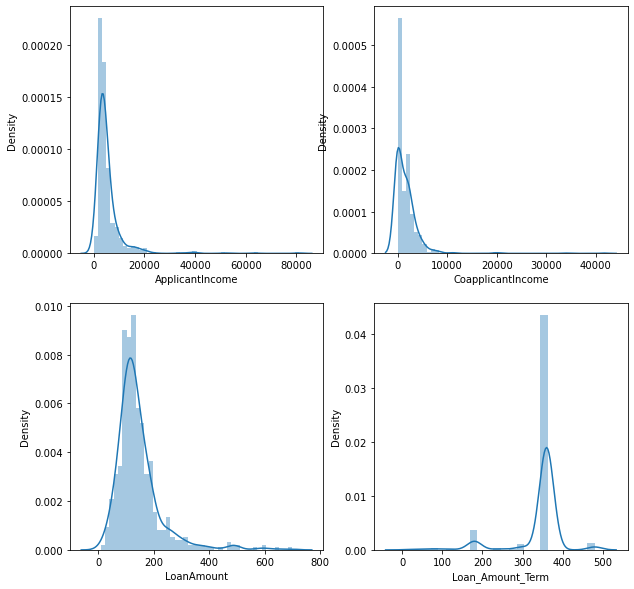

In [376]:
num_featres = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(10,10),facecolor='white')
plotnum = 1
for i in num_featres:
    if plotnum <=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- all the 4 features has skewness in the data

In [377]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.731705
Loan_Amount_Term    -2.373210
Credit_History      -2.021971
dtype: float64

#### Checking for outliers in data

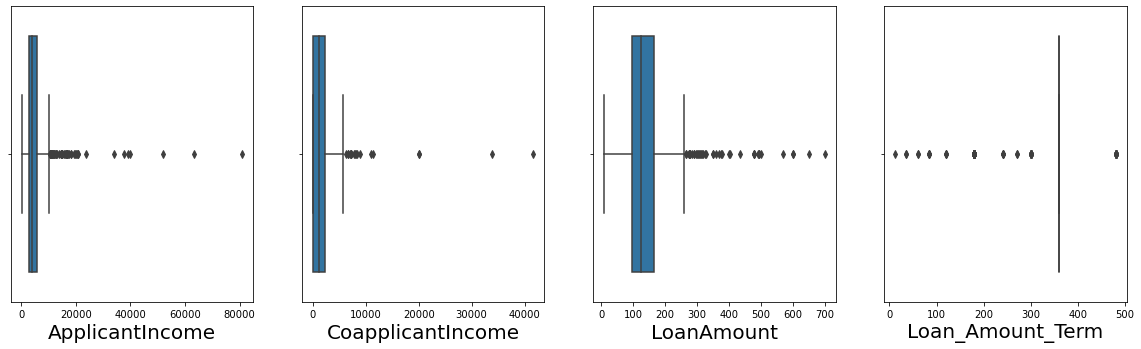

In [378]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for col in x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnum<=6:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- All the features have outliers in it

#### Removing outliers using z-score method

In [379]:
zdf = x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].copy()
from scipy.stats import zscore
zscor = zscore(zdf)
z_score_abs = np.abs(zscor)
zdf1 = zdf[(z_score_abs < 3).all(axis=1)]
print(zdf.shape)
print(zdf1.shape)

(614, 4)
(577, 4)


In [380]:
print('The data loss after applying zscore',(614-577)/614 * 100 )

The data loss after applying zscore 6.026058631921824


##### Removing outliers using IQR method

In [381]:
iqr_df = x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].copy()
indxdrop = np.array([])
for colmn in iqr_df:
    q1=iqr_df[colmn].quantile(0.25)
    q3=iqr_df[colmn].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = iqr_df[colmn]
    indx = col[(col>upperval) | (col<lowerval)].index
    indxdrop = np.append(indxdrop, indx)
iqr_df = iqr_df.drop(indxdrop)
iqr_df.shape

(456, 4)

In [382]:
print('The data loss after applying zscore',(614-456)/614 * 100 )

The data loss after applying zscore 25.732899022801302


Data loss is 25.73% which is not in acceptable range so going with z-score method

In [383]:
dropindx = x.index.difference(zdf1.index)
df.drop(dropindx,inplace=True)

In [384]:
df.shape

(577, 12)

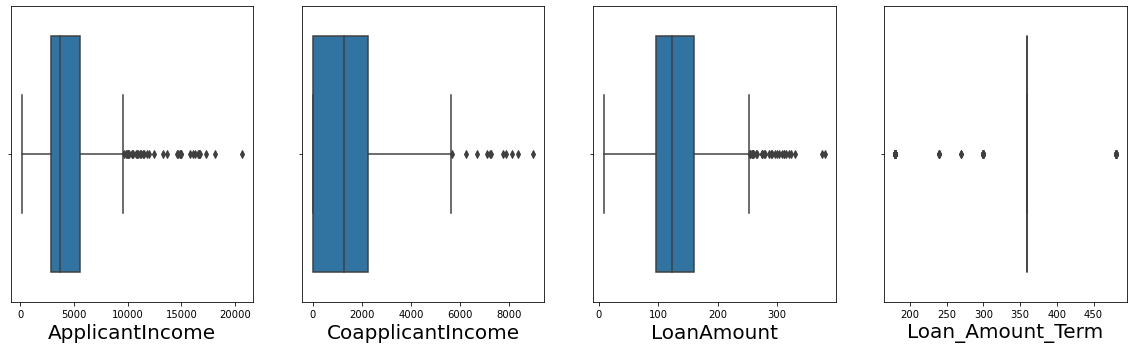

In [385]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for col in x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnum<=6:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- Some of the outliers has been removed

#### Skewness in data

In [386]:
x.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.167275
Loan_Amount_Term    -2.059849
Credit_History      -1.976043
dtype: float64

#### Reducing skewness using power Transformer

In [387]:
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer(method='yeo-johnson',standardize=True)
df_pt = x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
transformed = pow_trans.fit_transform(df_pt)
transformed = pd.DataFrame(transformed,columns=df_pt.columns)
transformed.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.042394
Loan_Amount_Term     0.703039
dtype: float64

- Most of the skewness has been removed

In [388]:
transformed.index = df.index
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.681780,-1.122446,-0.608350,0.139057,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.234783,0.744117,0.029280,0.139057,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.410600,0.139057,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.123834,0.139057,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.728848,-1.122446,0.264319,0.139057,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.587375,-1.122446,-1.265489,0.139057,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,0.035386,-1.122446,-2.323692,-2.544249,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.281658,0.173344,1.837032,0.139057,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.164426,-1.122446,0.990099,0.139057,1.0,Urban,Y


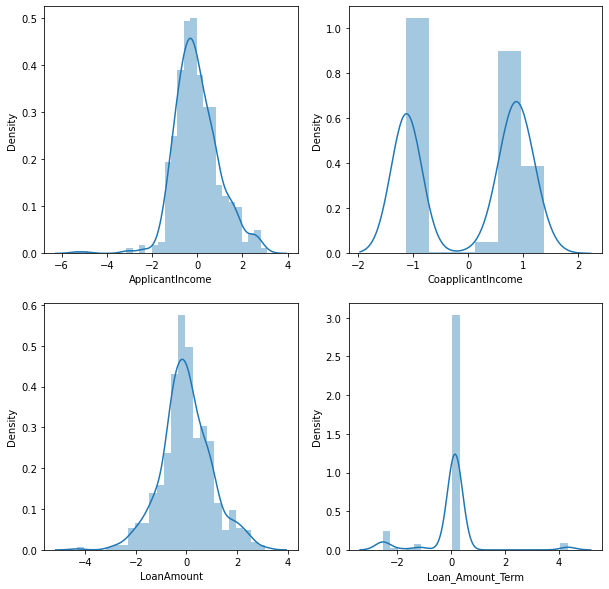

In [389]:
num_featres = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(10,10),facecolor='white')
plotnum = 1
for i in num_featres:
    if plotnum <=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- Distributions look much more normal now

In [390]:
x[['Gender','Married','Education','Self_Employed','Property_Area']].nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [391]:
dumm = pd.get_dummies(x[['Gender','Married','Education','Self_Employed','Property_Area']])

In [392]:
dumm

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,1,0,0
610,0,1,0,1,1,0,1,0,1,0,0
611,0,1,0,1,1,0,1,0,0,0,1
612,0,1,0,1,1,0,1,0,0,0,1


In [393]:
df=df.join(dumm)

In [394]:
df.drop(columns=['Gender','Married','Education','Self_Employed','Property_Area'],inplace=True)

##### Encoding the dependent and Loan_Status columns

In [395]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [396]:
df['Loan_Status'] = df.Loan_Status.map({'N':0,'Y':1})

#### Correlation

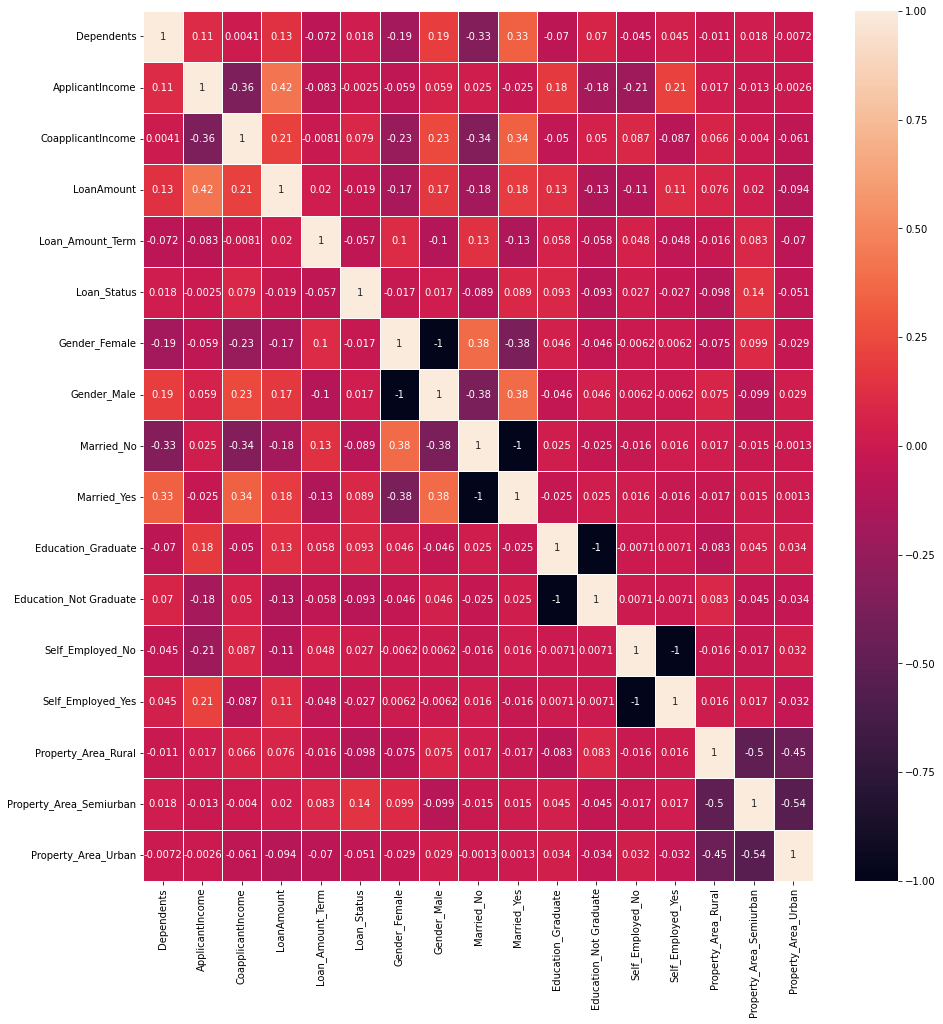

In [397]:
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

<AxesSubplot:>

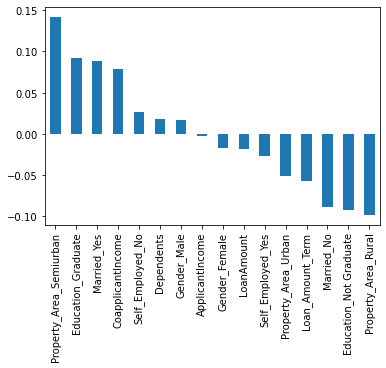

In [398]:
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')

- Property_Area_Semiurban,Education_Graduate,Married_Yes,CoapplicantIncome,Self_Employed_No,dependents,Gender_Male has the positive correlation
- ApplicationIncome,Gender_Female,LoanAmount,Self_Employed_Yes,Property_Area_urban,Loan_Amount_Term,Married_No,Education_Not_Graduate,Property_Area_Rural has negative correlation

In [399]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

#### Feature Selection

In [400]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

##### Checking multi collinearity using variation inflation factor

In [401]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif']= [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [402]:
vif

,Features,vif
0,Dependents,1.169442
1,ApplicantIncome,1.736830
2,CoapplicantIncome,1.589587
3,LoanAmount,1.530059
4,Loan_Amount_Term,1.051552
5,Credit_History,1.010515
6,Gender_Female,inf
7,Gender_Male,inf
8,Married_No,inf
9,Married_Yes,inf


- There is no multi-collinearity with the features

##### Principle component analaysis

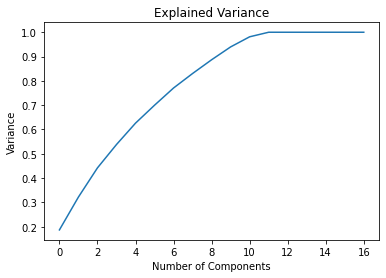

In [403]:
from sklearn.decomposition import PCA
pca = PCA()
principle_comp = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

- 12 components explains mostly 95% of data

In [404]:
pca = PCA(n_components=11)
new_comp=pca.fit_transform(scaled_x)
principle_x = pd.DataFrame(new_comp,columns=np.arange(11))

##### Selecting k-best features

In [405]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best_features = SelectKBest(score_func=f_classif, k=14)
best_fit = k_best_features.fit(x,y)
dfscores = pd.DataFrame(best_fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(17,'Score'))

                    Feature       Score
5            Credit_History  263.985861
15  Property_Area_Semiurban   11.779492
14      Property_Area_Rural    5.582130
11   Education_Not Graduate    4.979459
10       Education_Graduate    4.979459
9               Married_Yes    4.593676
8                Married_No    4.593676
2         CoapplicantIncome    3.642819
4          Loan_Amount_Term    1.865754
16      Property_Area_Urban    1.489499
13        Self_Employed_Yes    0.404840
12         Self_Employed_No    0.404840
3                LoanAmount    0.198788
0                Dependents    0.183728
7               Gender_Male    0.174308
6             Gender_Female    0.174308
1           ApplicantIncome    0.003548


In [407]:
#x_best = x.drop(columns=['ApplicantIncome',''])
scaled_x_best = scalar.fit_transform(x)

#### Model Building
##### Finding the best random state

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8547486033519553 on random_state: 30


In [409]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,classification_report,plot_roc_curve,roc_auc_score
from xgboost import XGBClassifier


In [414]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        accurcy = classification_report(y_test,model_predict)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print('Accuracy : ',accurcy)
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('Roc Auc Curve',roc_auc_score(y_test, model_predict))
        print('_______________________________________________')
compare_models()

Accuracy :                precision    recall  f1-score   support

           0       0.81      0.54      0.65        56
           1       0.82      0.94      0.88       123

    accuracy                           0.82       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.81      0.82      0.80       179

R2 score of the model :  LogisticRegression() = 14.2 %
mean squared error for model :  LogisticRegression() = 0.18435754189944134
cross val score for model :  LogisticRegression() = 0.8145474137931035
Roc Auc Curve 0.7394018583042973
_______________________________________________
Accuracy :                precision    recall  f1-score   support

           0       0.88      0.50      0.64        56
           1       0.81      0.97      0.88       123

    accuracy                           0.82       179
   macro avg       0.84      0.73      0.76       179
weighted avg       0.83      0.82      0.80       179

R2 score of the model :  SVC() = 16.8 %


- Based on above results we can say that Logistic regression is best model for the data

ROC AUC curves

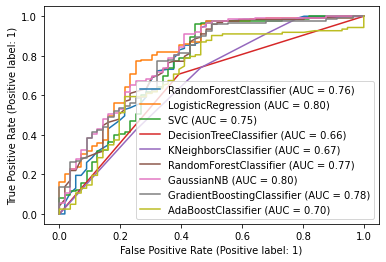

In [416]:
disp = plot_roc_curve(RandomForestClassifier().fit(x_train,y_train),x_test,y_test)
for i in models:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

#### Hyper Parameter Tuning

In [417]:
from sklearn.model_selection import GridSearchCV

In [419]:
import warnings
warnings.filterwarnings('ignore')
logistic_params = {'C': [0.0001,0.001,0.01,0.1,0,1,1,1.1],
                   'penalty':['11','12','elasticnet','none'],
                   'dual':[True,False],
                   'fit_intercept':[True,False]
    }
grid_classifier = GridSearchCV(LogisticRegression(),logistic_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalt

The best parameters are {'C': 0.0001, 'dual': False, 'fit_intercept': True, 'penalty': 'none'}
The best Score is 0.7989240506329113


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalt

#### Training the model with best parameters

In [422]:
best_model = LogisticRegression(C=0.0001,dual=False,fit_intercept=True,penalty='none')
best_model.fit(x_train,y_train)
logistic_pred_best = best_model.predict(x_test)
logistic_acc = accuracy_score(y_test,logistic_pred_best)
print(logistic_acc*100)

81.56424581005587


- Logistic regression has accuracy of 81.5

#### Confusion Matrix

In [423]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,logistic_pred_best)

In [424]:
conf

array([[ 30,  26],
       [  7, 116]])

#### Saving the model

In [425]:
import joblib
joblib.dump(best_model,"Loan_app_classif.pkl")

['Loan_app_classif.pkl']

#### Loading the model

In [426]:
mod = joblib.load("Loan_app_classif.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
174,1,1
175,0,1
176,1,1
177,1,1
